In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.gen_Distribution import Normal,Lorentzian,Quantile_Normal,Quantile_Lorentzian
from scipy.signal import find_peaks
from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.Get_groups import phase_diagram
import parmap
from tqdm.notebook import tqdm

from TO_sim.Utility import Create_Folder

In [6]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 6
t = np.arange(0,1500,0.1)
K = 3.5
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)

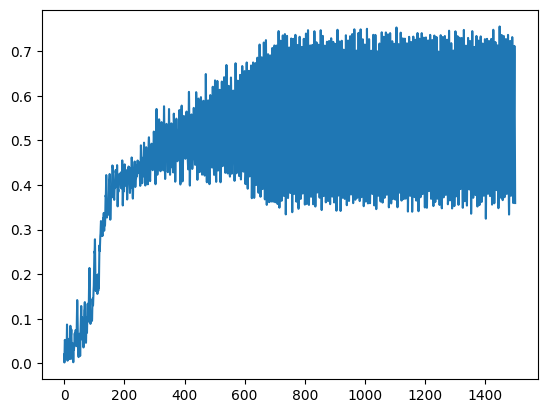

In [7]:
plt.plot(t,rs)

In [28]:
sum_time =500

In [29]:
dtheta_c = np.cumsum(dtheta,axis=0)
data = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
sum_time = 500
data_1 = data[::10]
t = np.arange(0,1200,0.1)
time = t[sum_time::10]
rstd_set =[]
rmean_set =[]
for i in range(len(theta)-sum_time):
    r_btw = rs[i:i+sum_time]
    rmean_set.append(np.mean(r_btw))
    rstd_set.append(np.std(r_btw))
    
rstd_set = rstd_set[::10]
rmean_set = rmean_set[::10]

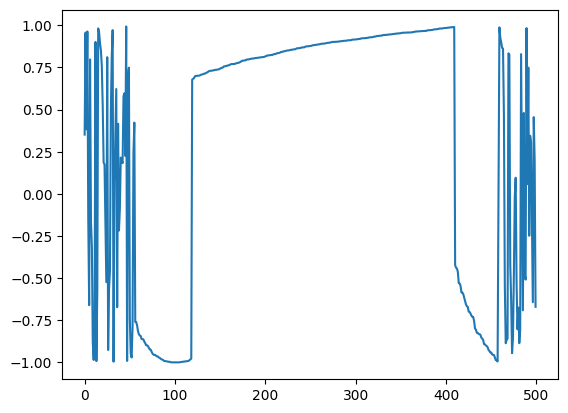

In [85]:
plt.plot(np.sin(theta[8000]))

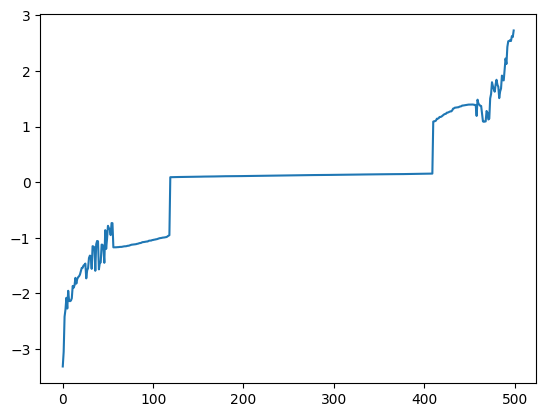

In [64]:
plt.plot(dtheta[8000])

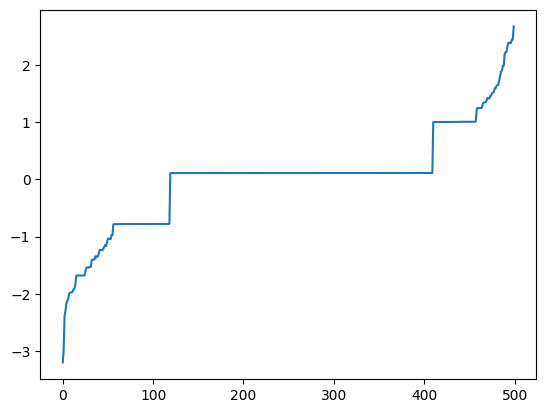

In [58]:
plt.plot(data_1[800]);

In [8]:
z = theta.T

In [9]:
x = np.linspace(-np.pi,np.pi,1000)
circle = {
    'x': np.cos(x),'y':np.sin(x)
}

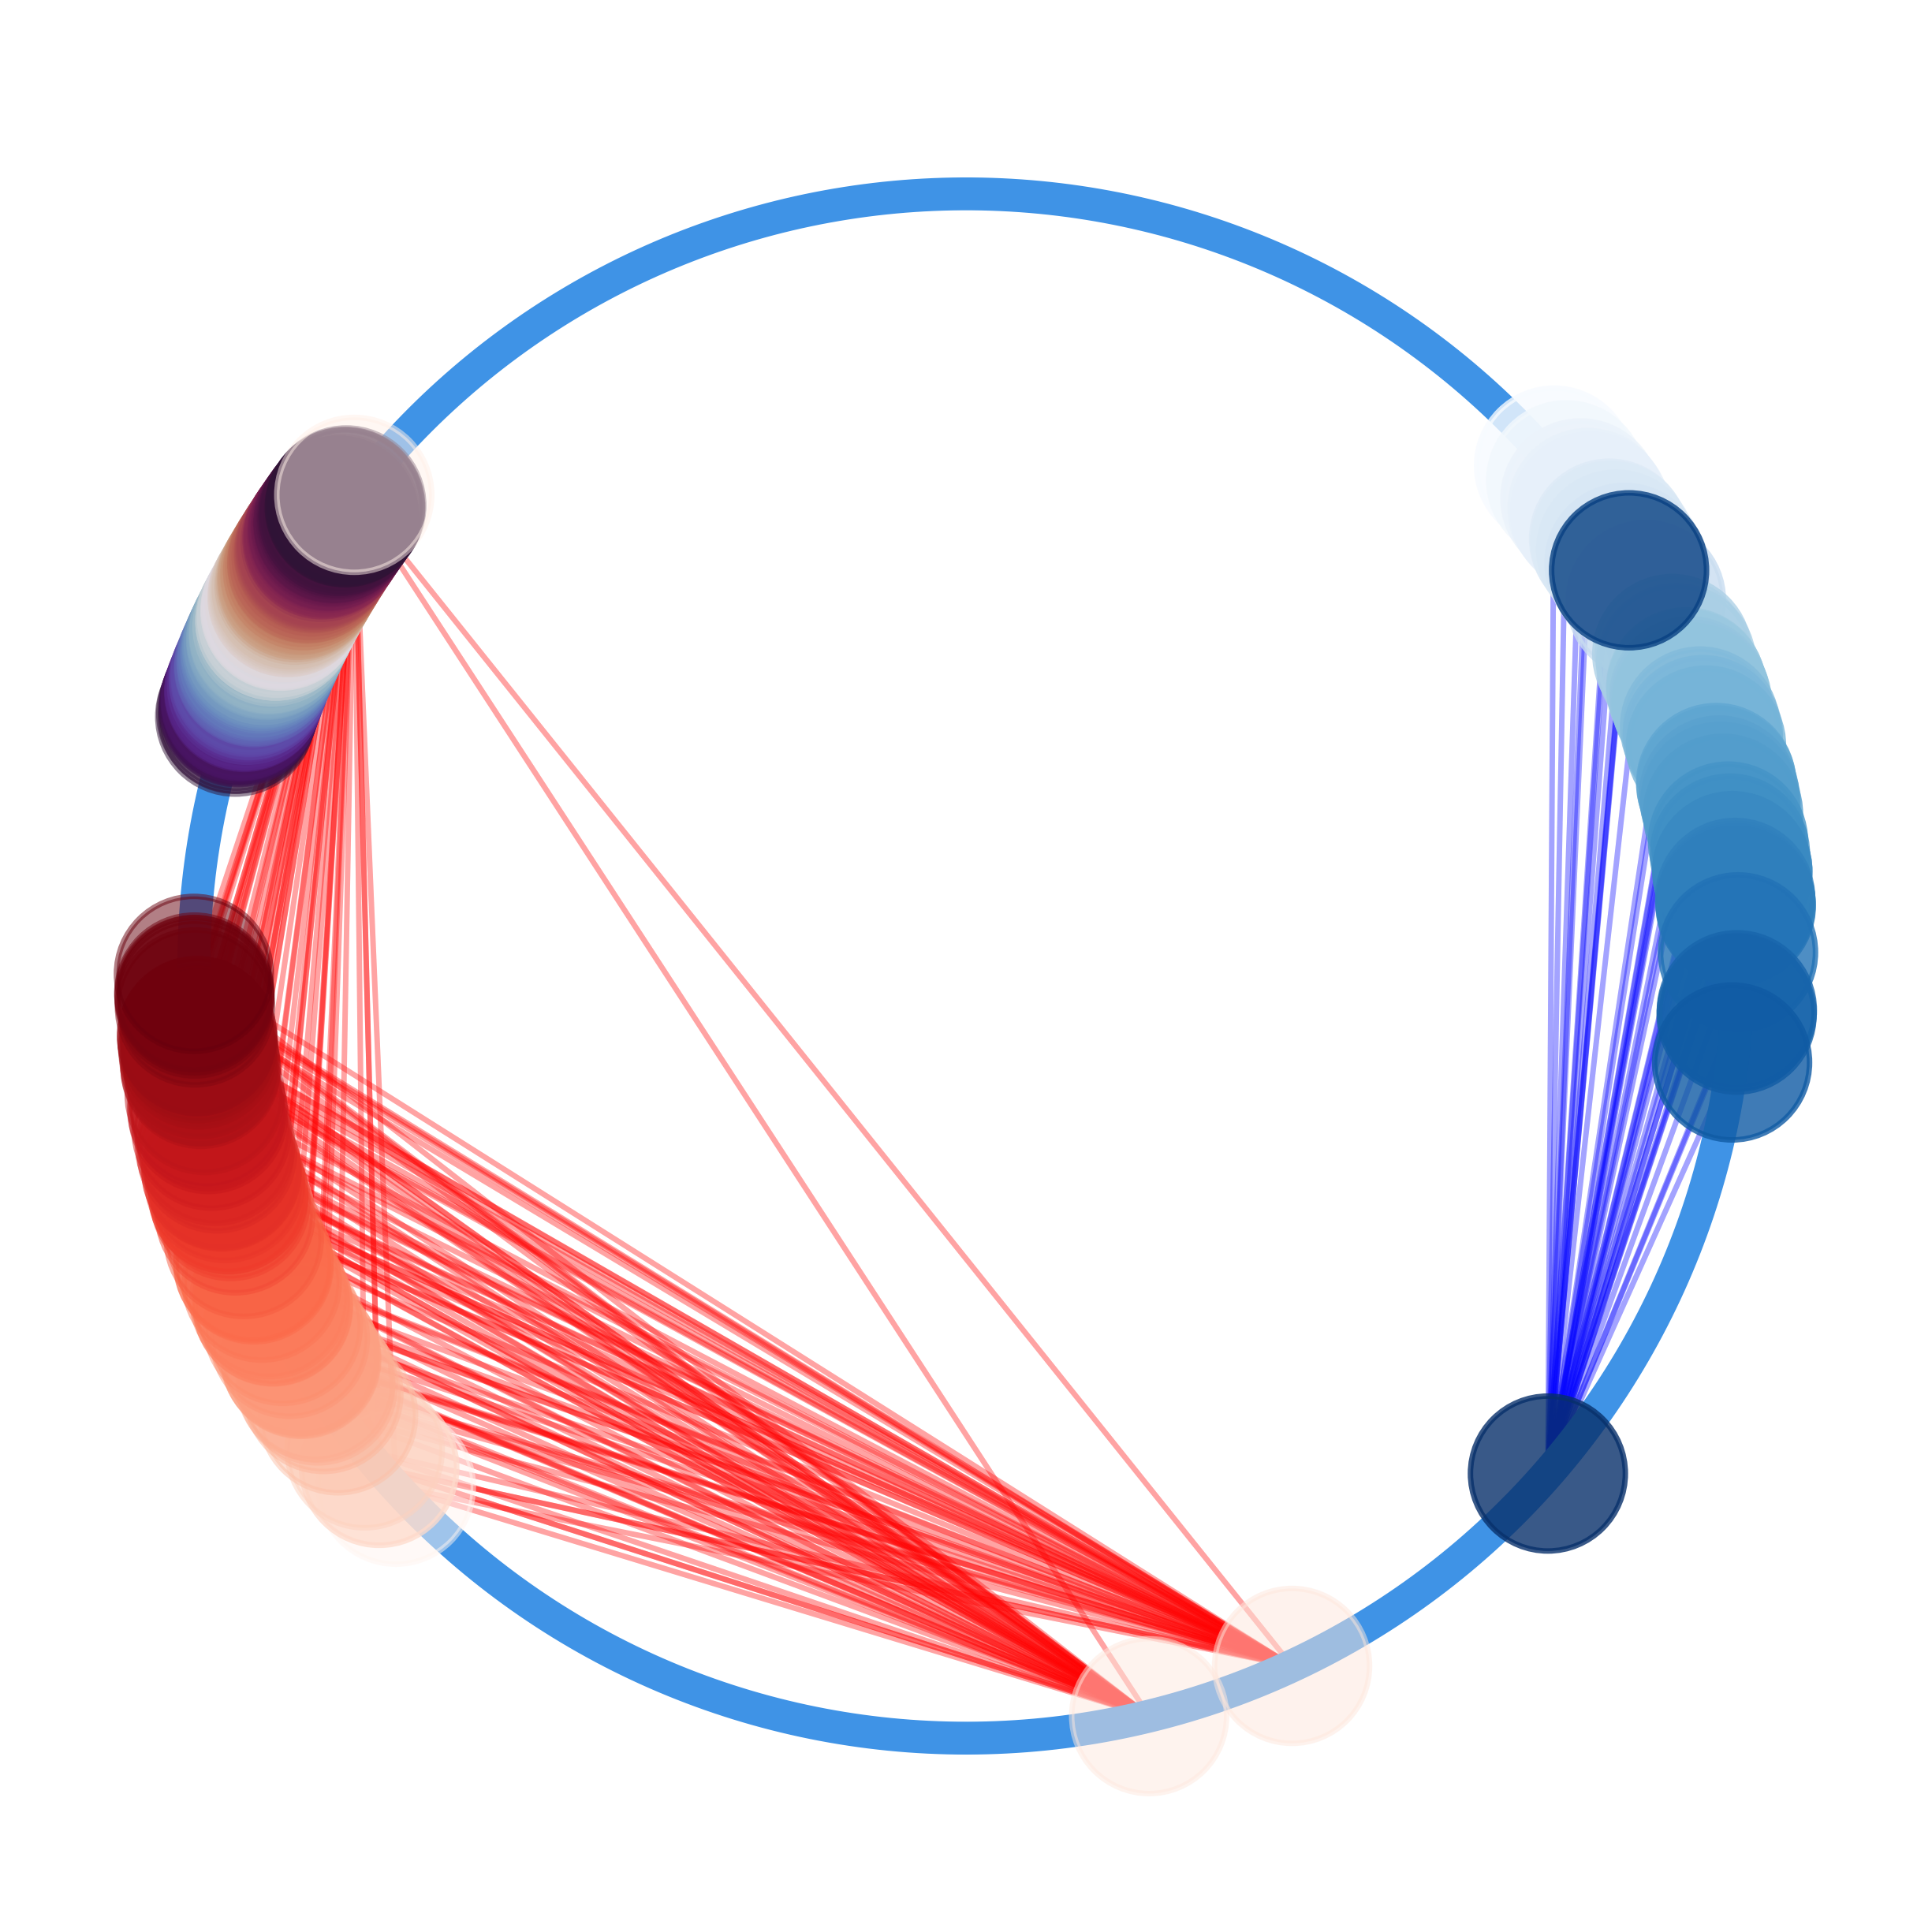

In [89]:
from itertools import combinations,permutations

i = 8000
index = i
s = 800
# fig = plt.figure(figsize=(5,5))
colors = ['#9D281B','#DC4838']
A,B = 50,100
X = np.sin(z[A:B,i])
Y = np.cos(z[A:B,i])
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=500,facecolor=(1,1,1,0))
data = {
    'x': X,'y':Y,
    'c': omega[A:B],'cmap':'Reds',
    # 'c': colors,#omega,'cmap':'YlOrRd',
    's':s,
    'alpha':0.5
}

line = {
    'x':list(permutations(X,2)),
    'y':list(permutations(Y,2))
}  
# plt.plot(tempx,tempy)
lw = 1
# colors = ['#9D281B','#DC4838']
for i in range(len(line['x'])):
    ax.plot(line['x'][i],line['y'][i],color='Red',zorder=0,lw=lw,alpha=0.2)
cax = ax.scatter(**data,zorder=2)



A,B = 200,300
X = np.sin(z[A:B,i])
Y = np.cos(z[A:B,i])
# fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=500,facecolor=(1,1,1,0))
data = {
    'x': X,'y':Y,
    'c': omega[A:B],'cmap':'twilight_shifted',
    # 'c': colors,#omega,'cmap':'YlOrRd',
    's':s,
    'alpha':0.5
}
line = {
    'x':list(permutations(X,2)),
    'y':list(permutations(Y,2))
}  
lw = 1
for i in range(len(line['x'])):
    ax.plot(line['x'][i],line['y'][i],color='Green',zorder=0,lw=lw,alpha=0.2)
cax = ax.scatter(**data,zorder=1)


A,B = 420,460
X = np.sin(z[A:B,i])
Y = np.cos(z[A:B,i])
# fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=500,facecolor=(1,1,1,0))
data = {
    'x': X,'y':Y,
    'c': omega[A:B],'cmap':'Blues',
    # 'c': colors,#omega,'cmap':'YlOrRd',
    's':s,
    'alpha':0.8
}
line = {
    'x':list(permutations(X,2)),
    'y':list(permutations(Y,2))
}  
lw = 1
for i in range(len(line['x'])):
    ax.plot(line['x'][i],line['y'][i],color='Blue',zorder=0,lw=lw,alpha=0.2)
cax = ax.scatter(**data,zorder=1)
# ax.plot([0,np.mean(X)],[0,np.mean(Y)],color='#9D281B',lw=3,marker='o')
# i = index

ax.plot(np.cos(x),np.sin(x),zorder=0,color='#3F93E6',lw=6)
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.axis('off')
plt.tight_layout()
# ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)

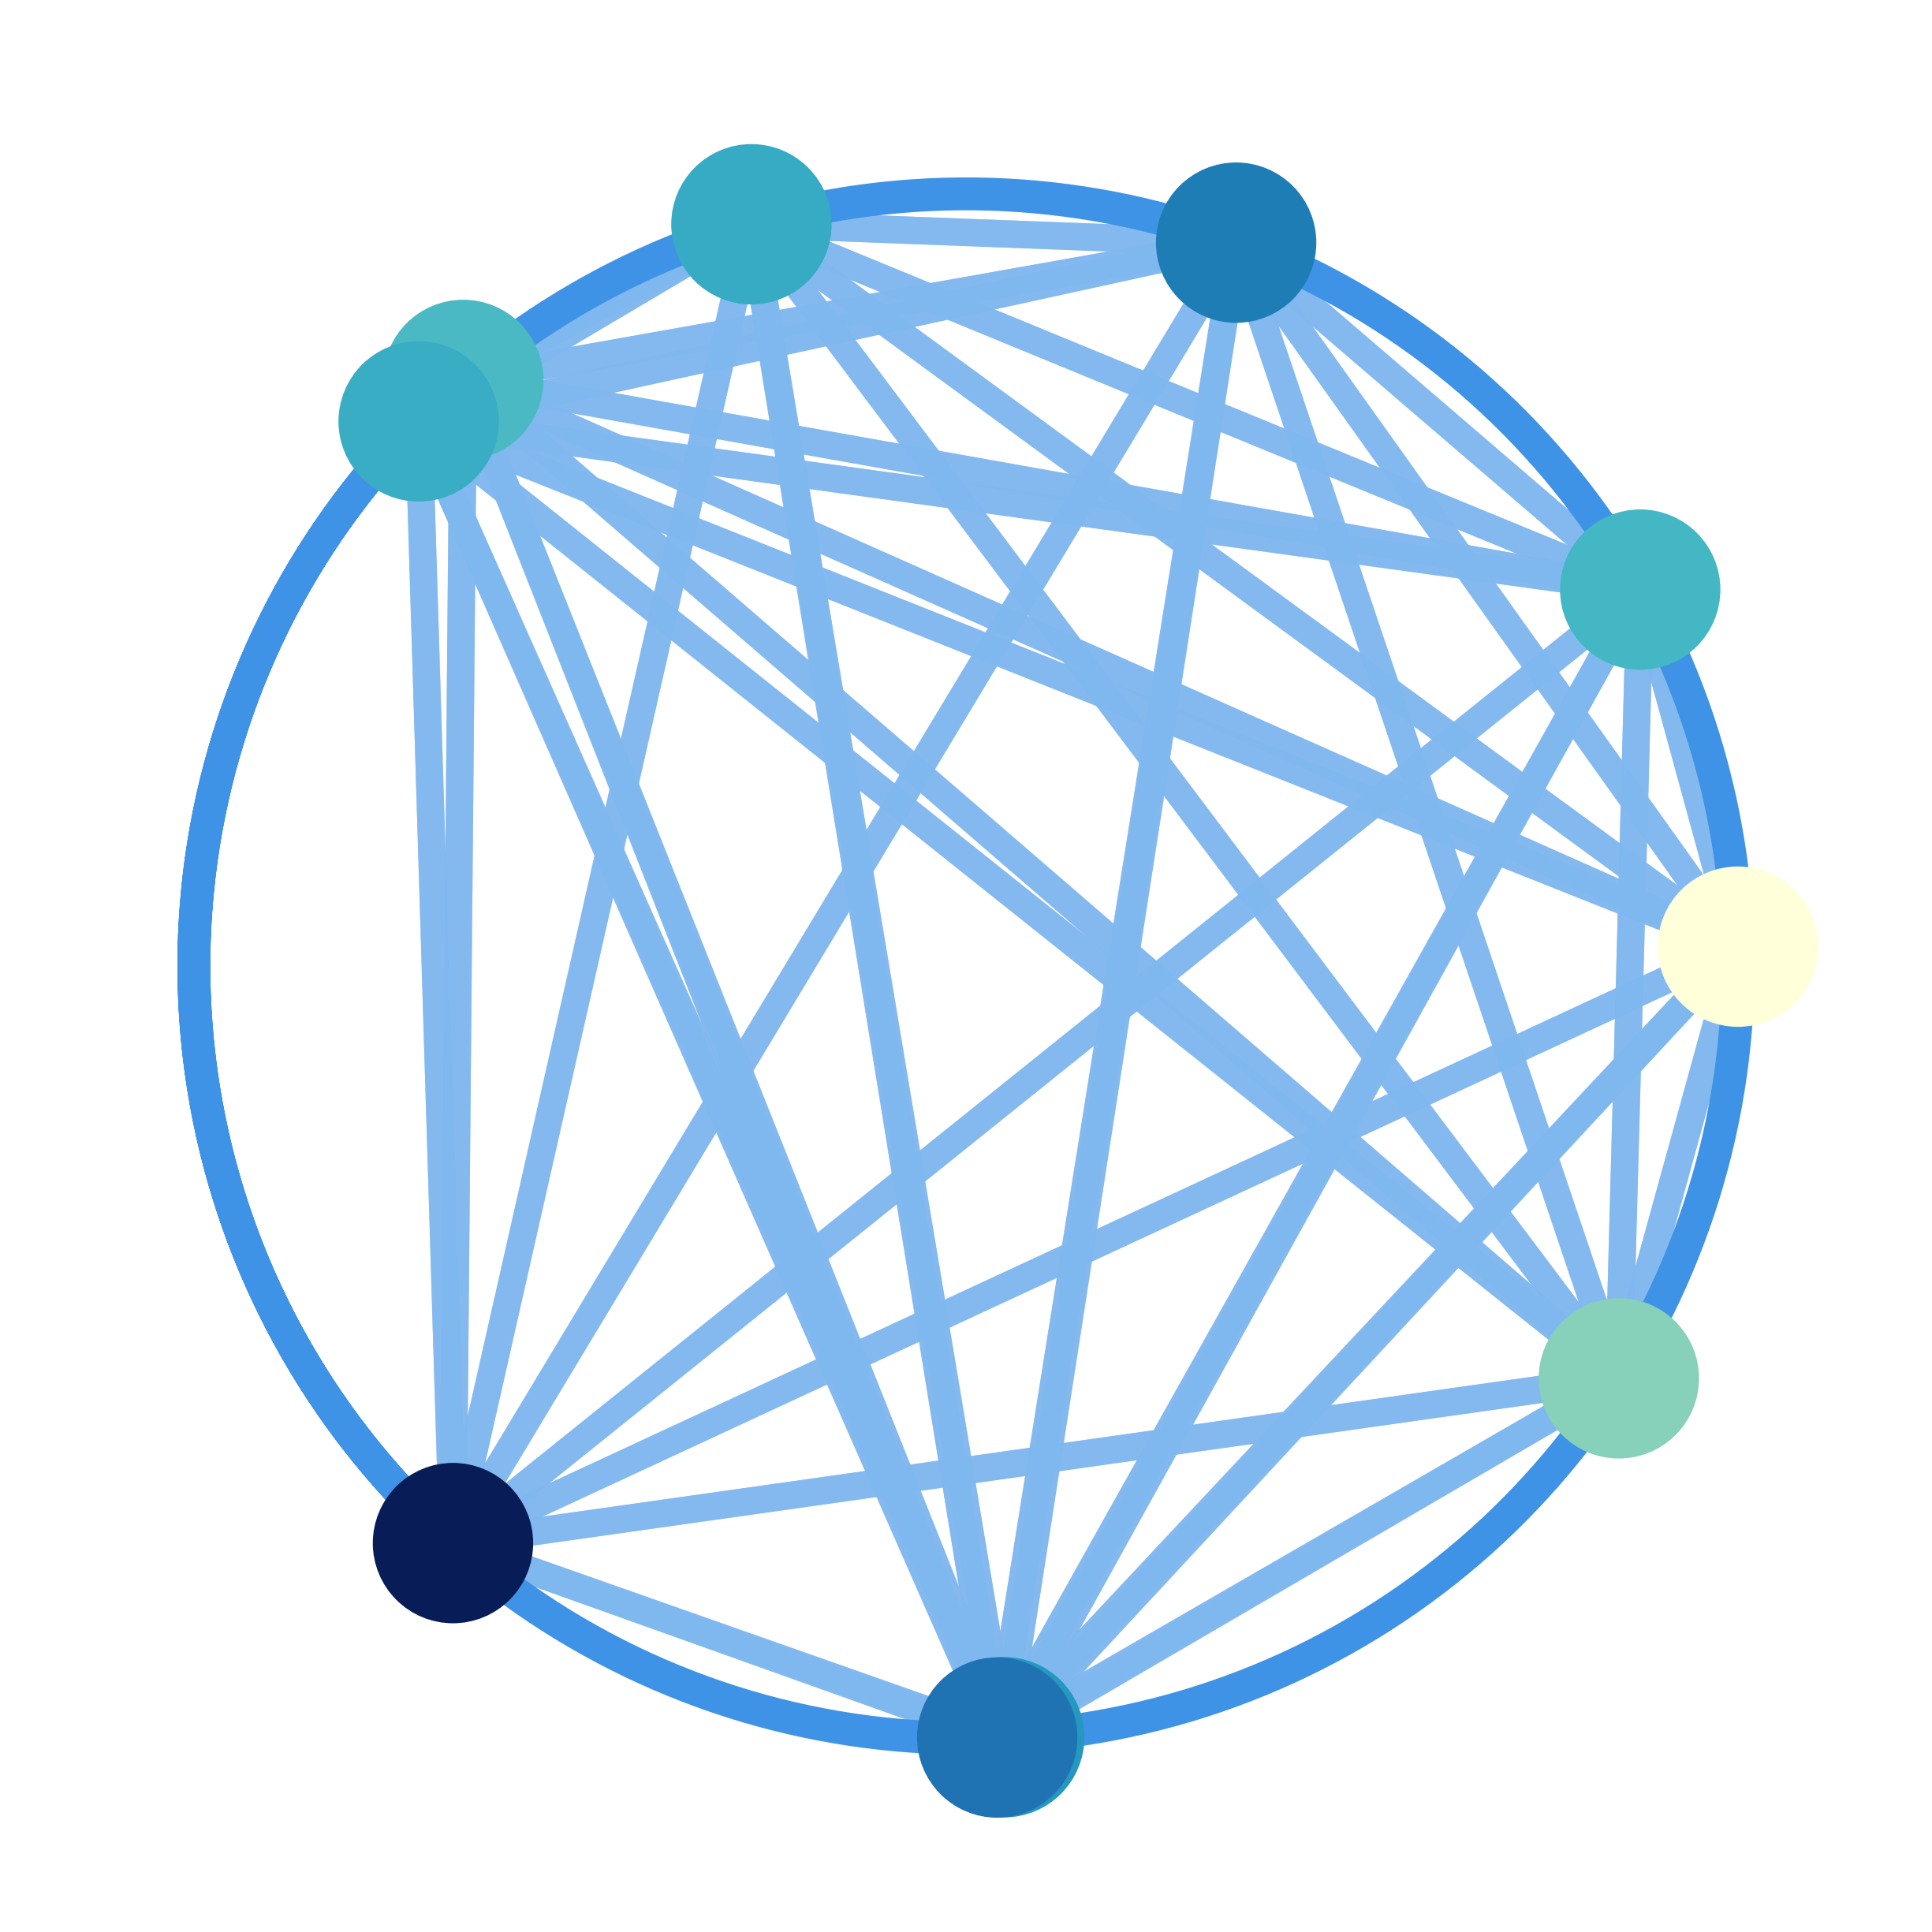

In [89]:
from itertools import combinations,permutations

i = 10
index = i
# fig = plt.figure(figsize=(5,5))
colors = ['#9D281B','#DC4838']

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=500,facecolor=(1,1,1,0))
data = {
    'x': np.sin(z[:,i]),'y':np.cos(z[:,i]),
    'c': omega,'cmap':'YlGnBu',
    # 'c': colors,#omega,'cmap':'YlOrRd',
    's':800
}
X = np.sin(z[:,i])
Y = np.cos(z[:,i])
line = {
    'x':list(permutations(X,2)),
    'y':list(permutations(Y,2))
}  
# plt.plot(tempx,tempy)
lw = 5
# colors = ['#9D281B','#DC4838']
for i in range(len(line['x'])):
    ax.plot(line['x'][i],line['y'][i],color='#7FB7EF',zorder=0,lw=lw,alpha=0.8)
# ax.plot([0,np.mean(X)],[0,np.mean(Y)],color='#9D281B',lw=3,marker='o')
i = index

ax.plot(np.cos(x),np.sin(x),zorder=0,color='#3F93E6',lw=6)
cax = ax.scatter(**data,zorder=1)
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.axis('off')
plt.tight_layout()
# ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)

In [64]:
import scipy.stats as ss

In [74]:
mu = 0
g = lambda x : ss.norm.pdf(x,loc = mu, scale =1.0)
# omega_gen = lambda N : ss.cauchy.rvs(loc = 0, scale =2, size = N)
omega_gen = lambda N : ss.norm.rvs(loc = mu, scale =1.0, size = N)
theta_gen = lambda N : np.linspace(-np.pi,np.pi,N,endpoint=False)
Kc = 2/(np.pi*g(mu))

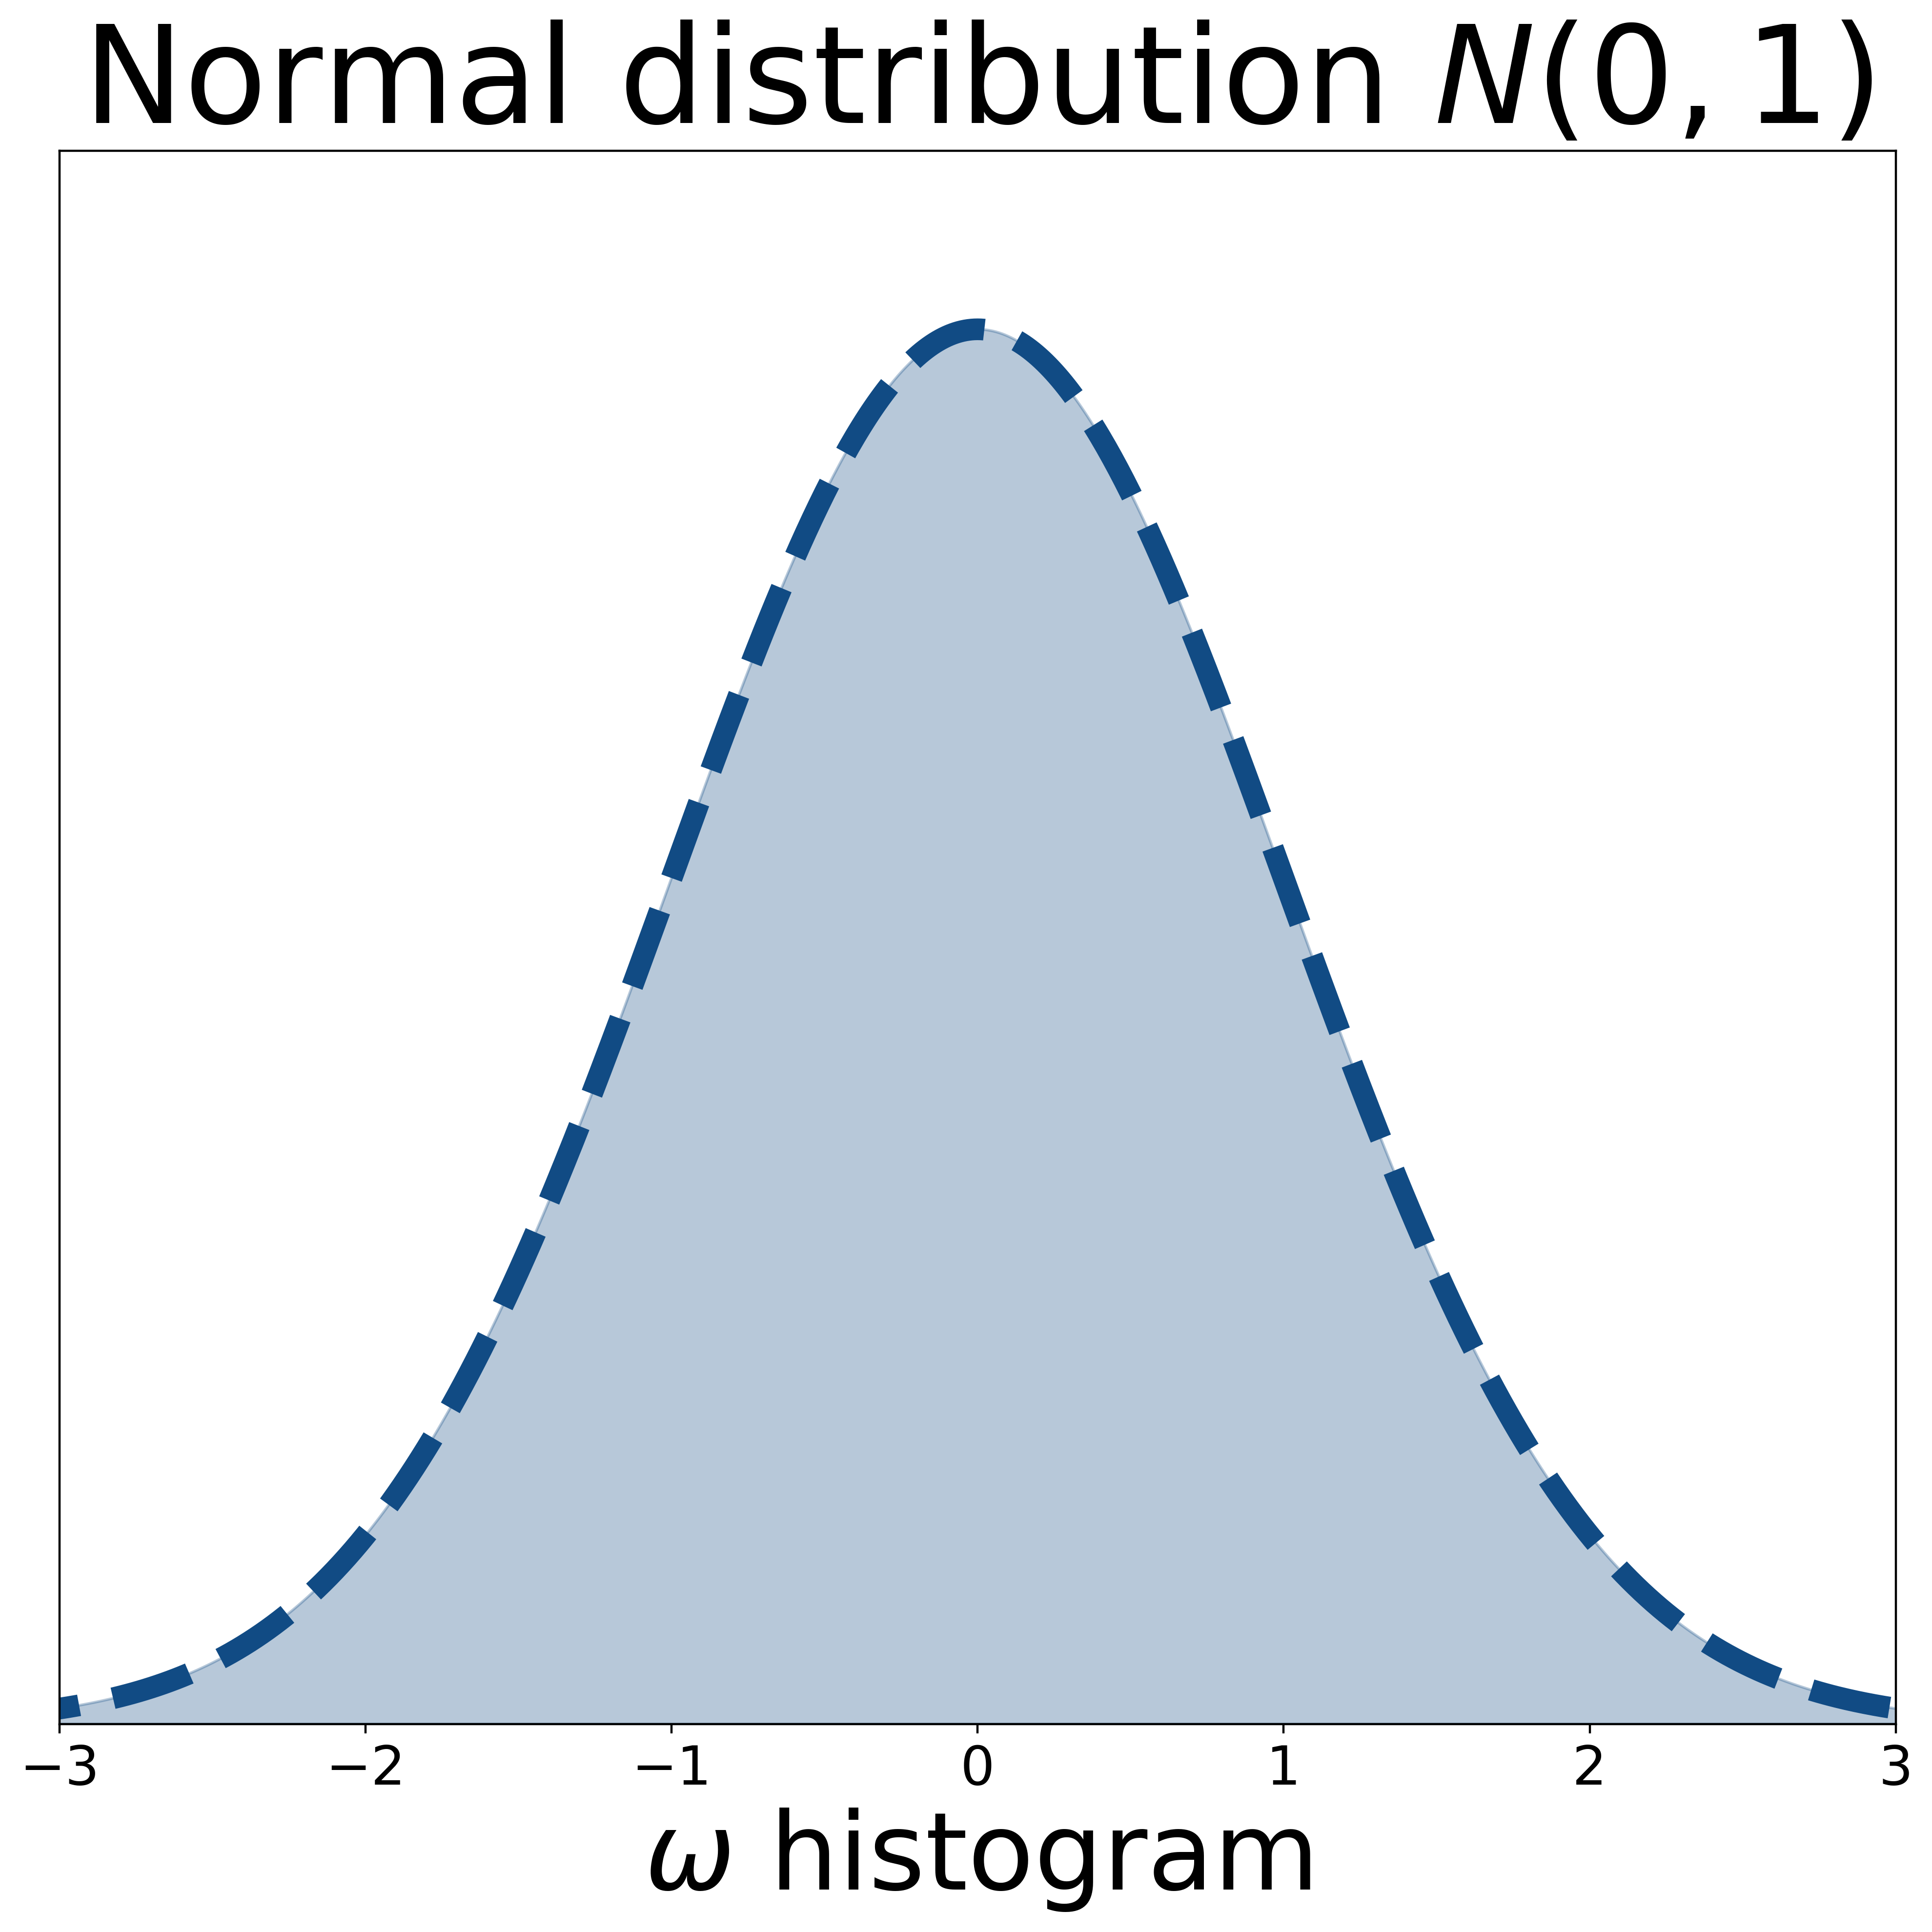

In [86]:
plt.figure(figsize=(10,10),dpi=400)
x = np.arange(-4,4,0.01)
# plt.hist(omega_gen(500),bins=100,density=True,color='#DC4838')
plt.xlabel(r'$\omega$ histogram',fontsize=40)
plt.ylabel('Density',fontsize=15)
plt.plot(x,g(x),lw=8,ls='--',color='#114B84')
plt.fill_between(x,g(x),color='#114B84',alpha=0.3)
plt.title(r'Normal distribution $N(0,1)$',fontsize=50)
plt.tight_layout()
plt.xticks(fontsize = 20)
plt.xlim(-3,3)
plt.ylim(0,0.45)
now = plt.gca()
now.axes.get_yaxis().set_visible(False)
plt.tight_layout()
# plt.savefig('./DATA_FILE/uniform_distribution.png',dpi=400, transparent = True)
# plt.savefig('./DATA_FILE/Normal distribution.jpg',dpi=800, transparent = True)
# plt.savefig('./DATA_FILE/uniform_distribution.png',dpi=400, transparent = True)
# plt.savefig(d)

In [ ]:
ST = 50
Ks = df.index
Ksr = rdf.index



Create_Folder(DF+f'{dist}/')

def mean_graph(ln):
    ln_x , ln_y = ln.get_data()
    dK_=0.01
    ln_Ks1 = np.arange(ln_x[0],ln_x[0]+1.5,dK_)
    ln_K1 = [np.where((ln_x>=ln_Ks1[i])&(ln_x<(ln_Ks1[i]+dK_))) for i in range(len(ln_Ks1))]
    ln_r1 = [np.mean(ln_y[idx]) for idx in ln_K1]
    dK_ = 0.1
    ln_Ks2 = np.arange(ln_Ks1[-1],np.max(ln_x),dK_)
    ln_K2 = [np.where((ln_x>=ln_Ks2[i])&(ln_x<(ln_Ks2[i]+dK_))) for i in range(len(ln_Ks2))]
    ln_r2 = [np.mean(ln_y[idx]) for idx in ln_K2]
    ln_Ks = np.r_[ln_Ks1,ln_Ks2]
    ln_r = np.array(ln_r1+ln_r2)
    ln.set_data([ln_Ks,ln_r])
# fw_r = fw_y[fw_K]

def dK_graph(ln,dK):
    ln_x , ln_y = ln.get_data()
    ln_Ks = np.arange(ln_x[0],ln_x[-1],dK)
    ln_Kidx = np.searchsorted(ln_x,ln_Ks)
    ln_r = ln_y[ln_Kidx]
    ln.set_data([ln_Ks,ln_r])
def Draw_Kr(m,ax):
    df = df_sets[m]
    rdf = rdf_sets[m]
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    categories = ['Theoretical', 'Simulated']
    Draw_ = DD(m=m,dist='Normal')
    # Draw_ = DDD(m=m)
    plt.sca(ax)
    fw,(bw,bwd) = Draw_.total()

    err_fw = plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label=r'Foward($K\uparrow$)')
    err_bw = plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label=r'Backward($K\downarrow$)')
    p5, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
    p7, = plt.plot([0],  marker='None',
           linestyle='None', label='dummy-empty')
    
    leg3 = plt.legend([p5, fw, err_fw, p5, bw, err_bw],
                      [r'Foward($K\uparrow$)'] + categories + [r'Backward($K\downarrow$)'] + categories,
                      loc = 4,ncol=2) # Two columns, vertical group labels
#     leg4 = plt.legend([p5, p7, p5, p7, fw, err_fw, bw, err_bw],
#               [r'Foward($K\uparrow$)', '', r'Backward($K\downarrow$)', ''] + categories + categories,
#               loc=4, ncol=2) # Two columns, horizontal group labels
    
    plt.grid()

    plt.xlim(0,13)
    plt.ylim(0,1)

    plt.xlabel('Coupling constant(K)',fontsize=13)
    plt.ylabel('Order parameter(r)',fontsize=13)
    plt.tight_layout()
    # plt.savefig(DF+f'{dist}/m = {m}, dK = {dK}, K vs r graph.png',dpi=400)
def make_sinij(m,K_idx,ax):
    def mean_wtime(x):
        temp = x[-100:,:]
        result = np.mean(temp,axis=0)
        return result
    plt.sca(ax)
    df = df_sets[m]
    mtheta_df = df.theta_s.apply(mean_wtime)
    seg_theta = mtheta_df.iloc[K_idx]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',aspect='auto')
    plt.xticks([0,500])
    plt.yticks([0,500])
    plt.xlabel('i-th oscillator',fontsize=15)
    plt.ylabel('j-th oscillator',fontsize=15)
    # plt.title(f'K = {Ks[K_idx]}',fontsize=18)
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size="2%", pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_ticks([-1,0,1])
    cbar.set_label(r'$\sin(\theta_j-\theta_i)$')
def make_sinij_nocbar(m,K_idx,ax):
    def mean_wtime(x):
        temp = x[-100:,:]
        result = np.mean(temp,axis=0)
        return result
    plt.sca(ax)
    df = df_sets[m]
    mtheta_df = df.theta_s.apply(mean_wtime)
    seg_theta = mtheta_df.iloc[K_idx]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',aspect='auto')
    plt.xticks([0,500])
    plt.yticks([0,500])
    plt.xlabel('i-th oscillator',fontsize=15)
    plt.ylabel('j-th oscillator',fontsize=15)

In [ ]:
plt.close('all')
plt.style.use('default')
fig = plt.figure(figsize=(12.8,9.6),facecolor='white')
plt.rc('xtick',labelsize=13*multi_)
plt.rc('ytick',labelsize=13*multi_)

ax1 = plt.subplot2grid((5, 3), (0, 0),colspan = 3,rowspan=3,fig=fig)
ax2 = plt.subplot2grid((5, 3), (3, 0),rowspan=2,fig=fig)
ax3 = plt.subplot2grid((5, 3), (3, 1),rowspan=2,fig=fig)
ax4 = plt.subplot2grid((5, 3), (3, 2),rowspan=2,fig=fig)


# ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
# ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
# ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
Draw_Kr(m,ax1)
make_sinij_nocbar(m,min_r,ax2)
make_sinij_nocbar(m,max_std,ax3)

make_sinij_nocbar(m,11,ax2)
make_sinij_nocbar(m,29,ax3)
# make_sinij(m,min_std,ax4)
make_sinij(m,50,ax4)
ax3.set_ylabel('')
ax4.set_ylabel('')

ax1.set_title('(a)',fontsize=18*multi_,loc='left')
ax2.set_title('(b)',fontsize=18*multi_,loc='left')
ax3.set_title('(c)',fontsize=18*multi_,loc='left')
ax4.set_title('(d)',fontsize=18*multi_,loc='left')
fig.tight_layout()
# fig.savefig(DF+'Abstract_fig.pdf',dpi=400,format='pdf')
fig.savefig(DF+f'Abstract_fig_dist={dist}.pdf',dpi=400,format='pdf')
fig.savefig(DF+f'for abstarct m={m},dist={dist},K = {[0.1,Ks[max_std],Ks[min_std]]},t_end = {t_end},N = {N}.png',dpi=400)